In [1]:
!pip install numpy pandas scikit-learn matplotlib scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [3]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

load dataset (california housing)

In [4]:
housing = fetch_california_housing()

X_raw = housing.data
feature_names = housing.feature_names

# Extract coordinates
longitude = X_raw[:, housing.feature_names.index('Longitude')]
latitude = X_raw[:, housing.feature_names.index('Latitude')]

coords = np.column_stack([longitude, latitude])

# Remove coordinates from PCA features
feature_mask = [name not in ['Longitude', 'Latitude'] for name in feature_names]
X = X_raw[:, feature_mask]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

n = X.shape[0]

print("Samples:", n)
print("Features:", X.shape[1])

Samples: 20640
Features: 6


dataset consists of a lot of points: ~20k
we subsample first

In [5]:
np.random.seed(42)
idx = np.random.choice(n, 1500, replace=False)

X = X[idx]
coords = coords[idx]

n = X.shape[0]

complete distane matrix

In [6]:
D = cdist(coords, coords)

we will use gaussian kernel for the weights

In [7]:
def gaussian_kernel(distances, bandwidth):
    return np.exp(-(distances**2) / (2 * bandwidth**2))

apply local pca

In [8]:
def local_pca(X, weights):
    W = np.diag(weights)
    cov = X.T @ W @ X
    eigvals, eigvecs = np.linalg.eigh(cov)

    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]

    explained = eigvals / eigvals.sum()
    return explained

run gwpa

In [9]:
bandwidth = 1.5  # try tuning this

local_explained = []

for i in range(n):
    weights = gaussian_kernel(D[i], bandwidth)
    explained = local_pca(X, weights)
    local_explained.append(explained)

local_explained = np.array(local_explained)

Visualize Spatial PC1 Variation

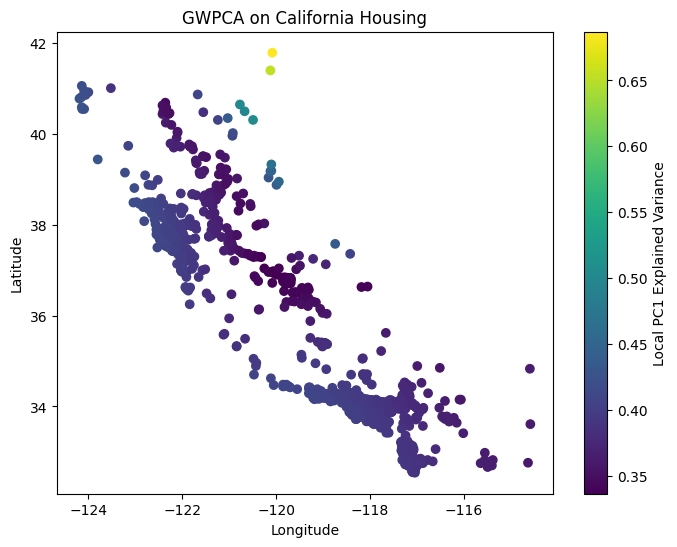

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1],
            c=local_explained[:,0],
            cmap='viridis')
plt.colorbar(label="Local PC1 Explained Variance")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("GWPCA on California Housing")
plt.show()